# Delivery Time Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

In [2]:
# 1) Delivery_time -> Predict delivery time using sorting time
data1=pd.read_csv('delivery_time.csv')

In [3]:
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data1_pd = pd.DataFrame(data1)
data1_pd.rename(columns = {'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, inplace = True)
data1_pd.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data1_pd.shape

(21, 2)

In [6]:
data1_pd.info()   #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
data1_pd.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data1_pd[data1_pd.duplicated()] #no duplicates

,delivery_time,sorting_time


array([[<Axes: title={'center': 'delivery_time'}>,
        <Axes: title={'center': 'sorting_time'}>]], dtype=object)

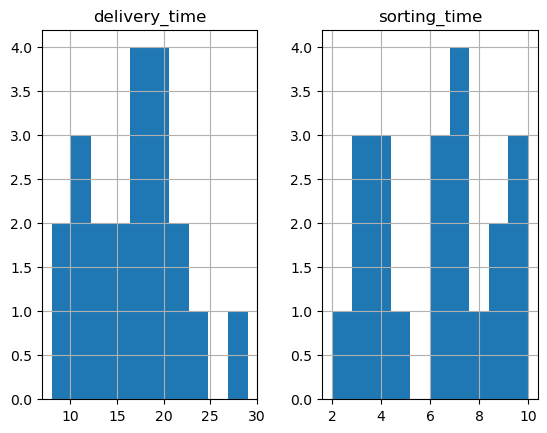

In [9]:
data1_pd.hist()  #visualization

<Axes: >

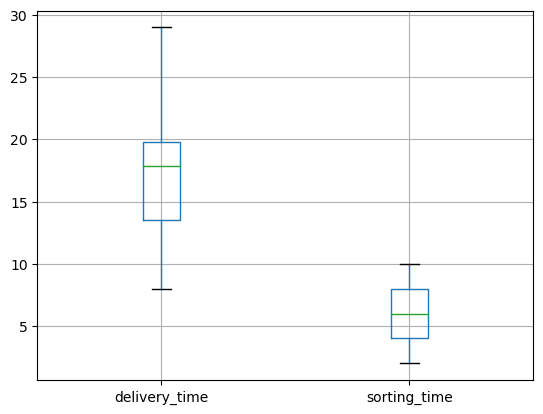

In [10]:
data1_pd.boxplot()   #visualization
# no outliers in the data

<Axes: >

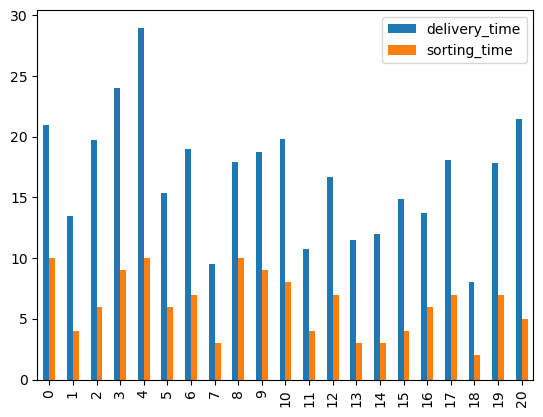

In [11]:
data1_pd.plot.bar()   #visualization

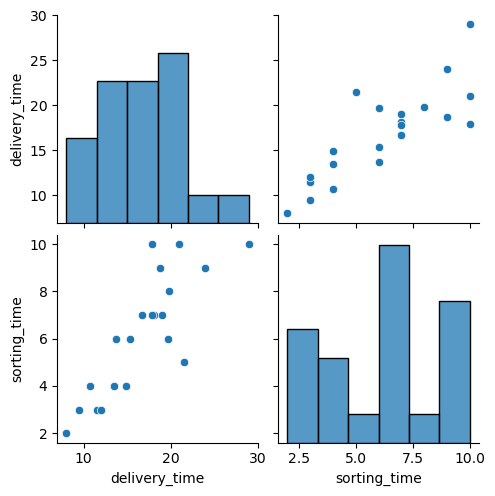

In [12]:
sns.pairplot(data1_pd)

In [13]:
#correlation
data1_pd.corr()   # moderate correlation between delivery time and sorting time

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\sycmy\AppData\Local\Temp\ipykernel_15828\1308626878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1_pd['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

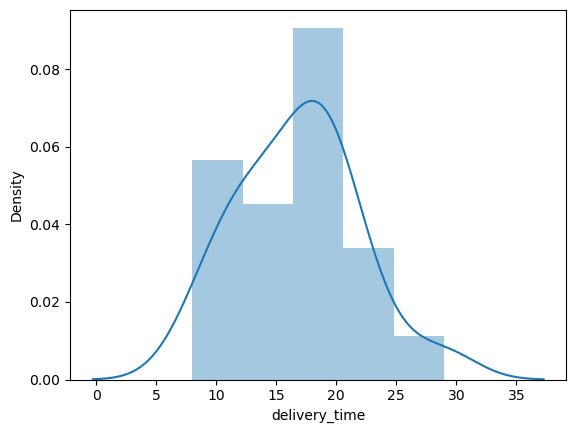

In [14]:
sns.distplot(data1_pd['delivery_time'])    

C:\Users\sycmy\AppData\Local\Temp\ipykernel_15828\2814972681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1_pd['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

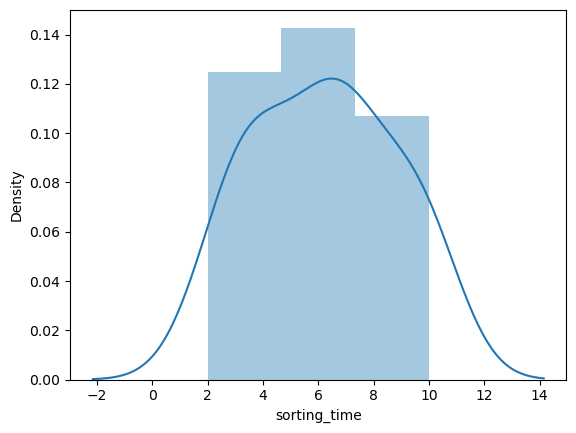

In [15]:
sns.distplot(data1_pd['sorting_time'])

In [16]:
# y= dependent variable= delivery time and x= independent variable= sorting time

In [17]:
# 1) no transformation used
model=smf.ols('delivery_time~sorting_time',data=data1_pd).fit()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

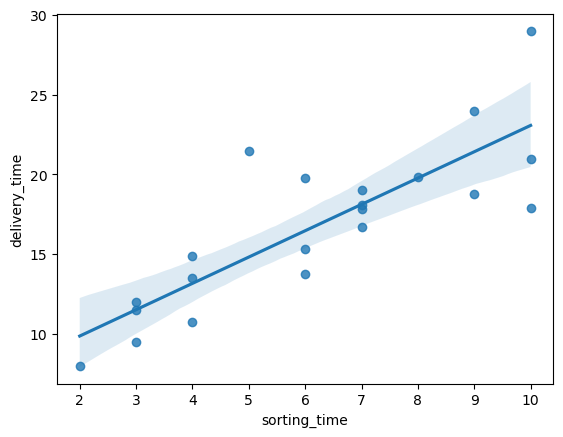

In [18]:
# plot to see best fit line

sns.regplot(x='sorting_time',y='delivery_time',data=data1_pd)

In [19]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [21]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [22]:
# For Hypothesis Testing:
# H0: There is no relation between delivery time and sorting time.
# H1: There is relation between delivery time and sorting time.
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

In [23]:
model.rsquared  # r square value between 0 and 1
# 0.68 r square value means the model is avergae working.

0.6822714748417231

In [24]:
# prediction for existing data point
delivery_time= ((1.649)*10)+(6.582)
delivery_time

23.072000000000003

In [25]:
# prediction for new data point
newdata1=pd.Series([2,11])
data1_pd_pred=pd.DataFrame(newdata1,columns=['sorting_time'])
data1_pd_pred

,sorting_time
0,2
1,11


In [26]:
model.predict(data1_pd_pred)

0     9.880774
1    24.721953
dtype: float64

In [27]:
# 2) log transformation 
trf=FunctionTransformer(func=np.log1p)

In [28]:
x_transformed=trf.fit_transform(data1_pd['sorting_time'])
x_transformed.head()

0    2.397895
1    1.609438
2    1.945910
3    2.302585
4    2.397895
Name: sorting_time, dtype: float64

In [29]:
transformed_model=smf.ols('delivery_time~x_transformed',data=data1_pd).fit()

In [30]:
transformed_model.params

Intercept        -4.099013
x_transformed    10.959246
dtype: float64

In [31]:
transformed_model.tvalues

Intercept       -1.272674
x_transformed    6.611817
dtype: float64

In [32]:
transformed_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept        0.218488
x_transformed    0.000003
dtype: float64

In [33]:
transformed_model.rsquared

0.6970476042045003

In [34]:
# prediction for existing data point
delivery_time= ((10.959)*2.397895)+(-4.099)
delivery_time

22.179531305

In [35]:
# 3) Square transformation 
trf2=FunctionTransformer(func=np.square)

In [36]:
x_transformed2=trf2.fit_transform(data1_pd['sorting_time'])
x_transformed2.head()

0    100
1     16
2     36
3     81
4    100
Name: sorting_time, dtype: int64

In [37]:
transformed2_model=smf.ols('delivery_time~x_transformed2',data=data1_pd).fit()

In [38]:
transformed2_model.params

Intercept         11.237205
x_transformed2     0.124870
dtype: float64

In [39]:
transformed2_model.tvalues

Intercept         9.398601
x_transformed2    5.691330
dtype: float64

In [40]:
transformed2_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept         1.415704e-08
x_transformed2    1.739194e-05
dtype: float64

In [41]:
transformed2_model.rsquared
#model accuracy is decreasing

0.6302871815826637

In [42]:
# prediction for existing data point
delivery_time= ((0.124)*100)+(11.237)
delivery_time

23.637

In [43]:
# 4) square root transformation
trf3=FunctionTransformer(func=np.sqrt)

In [44]:
x_transformed3=trf3.fit_transform(data1_pd['sorting_time'])
x_transformed3.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: sorting_time, dtype: float64

In [45]:
transformed3_model=smf.ols('delivery_time~x_transformed3',data=data1_pd).fit()

In [46]:
transformed3_model.params

Intercept        -2.518837
x_transformed3    7.936591
dtype: float64

In [47]:
transformed3_model.tvalues

Intercept        -0.840911
x_transformed3    6.592434
dtype: float64

In [48]:
transformed3_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept         0.410857
x_transformed3    0.000003
dtype: float64

In [49]:
transformed3_model.rsquared

0.6958062276308671

In [50]:
# prediction for existing data point
delivery_time= ((7.936)*3.162)+(-2.518)
delivery_time

22.575632

In [51]:
# 5) cube root transformation
trf4=FunctionTransformer(func=np.cbrt)

In [52]:
x_transformed4=trf4.fit_transform(data1_pd['sorting_time'])
x_transformed4.head()

0    2.154435
1    1.587401
2    1.817121
3    2.080084
4    2.154435
Name: sorting_time, dtype: float64

In [53]:
transformed4_model=smf.ols('delivery_time~x_transformed4',data=data1_pd).fit()

In [54]:
transformed4_model.params

Intercept        -11.579201
x_transformed4    15.767284
dtype: float64

In [55]:
transformed4_model.tvalues

Intercept        -2.672712
x_transformed4    6.617624
dtype: float64

In [56]:
transformed4_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept         0.015048
x_transformed4    0.000002
dtype: float64

In [57]:
transformed4_model.rsquared

0.6974182292354247

In [58]:
# prediction for existing data point
delivery_time= ((15.767)*2.154)+(-11.579)
delivery_time

22.383117999999996

In [59]:
# no transformation: r square value: 0.682
# log transformation: r square value: 0.697
# square transformation: r square value: 0.630
# square root transformation: r square value: 0.695
# cube root transformation: r square value: 0.697
# since r square value of log transformation and cuberoot transformation is equal and closer to 1, we use log transformation.

In [63]:
# prediction for new data point using log transformed model
newdata1=pd.Series([2,11])
newdata2=trf.fit_transform(newdata1)
newdata2.head()

0    1.098612
1    2.484907
dtype: float64

In [64]:
transformed_data1_pd_pred=pd.DataFrame(newdata2,columns=['x_transformed'])
transformed_data1_pd_pred
transformed_model.predict(transformed_data1_pd_pred)

0     7.940950
1    23.133691
dtype: float64